In [1]:
# Libraries
import time
import pandas as pd    
# ------------- # 
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys

# Driver path
from selenium.webdriver.chrome.service import Service

path = '/Users/Jacks/Downloads/chromedriver.exe'
service = Service(path)

driver = webdriver.Chrome(service=service)

In [2]:
# Maximize Window
driver.maximize_window() 
driver.minimize_window() 
driver.maximize_window() 
driver.switch_to.window(driver.current_window_handle)
driver.implicitly_wait(10)

In [3]:
# Enter to the site
driver.get('https://www.linkedin.com/login')
time.sleep(2)

In [4]:
# User Credentials
user_name = 'jackstephwhite@gmail.com'
password = 'Harley9357!'
driver.find_element_by_xpath('//*[@id="username"]').send_keys(user_name)
driver.find_element_by_xpath('//*[@id="password"]').send_keys(password)
time.sleep(1)

<ipython-input-4-64e66625f854>:4: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_xpath('//*[@id="username"]').send_keys(user_name)
<ipython-input-4-64e66625f854>:5: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_xpath('//*[@id="password"]').send_keys(password)


In [5]:
# Login button
driver.find_element_by_xpath('//*[@id="organic-div"]/form/div[3]/button').click()
driver.implicitly_wait(30)

<ipython-input-5-66d5c6a1e146>:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_xpath('//*[@id="organic-div"]/form/div[3]/button').click()


In [6]:
# Access to the Jobs button and click it
driver.find_element_by_xpath('//*[@id="global-nav"]/div/nav/ul/li[3]').click()
time.sleep(3)

<ipython-input-6-54f708fbc473>:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_xpath('//*[@id="global-nav"]/div/nav/ul/li[3]').click()


In [7]:
# Go to search results directly via link
driver.get("https://www.linkedin.com/jobs/search?keywords=Analytics&location=New%20York%20City%20Metropolitan%20Area&geoId=90000070&trk=public_jobs_jobs-search-bar_search-submit&position=1&pageNum=0")
time.sleep(1)


In [11]:
links = []
print('Links are being collected now.')
try:
    for page in range(2, 14):
        time.sleep(2)
        jobs_block = driver.find_element_by_class_name('scaffold-layout__list-container')
        jobs_list = jobs_block.find_elements(By.CSS_SELECTOR, '.jobs-search-results__list-item')

        for job in jobs_list:
            all_links = job.find_elements_by_tag_name('a')
            for a in all_links:
                href = a.get_attribute('href')
                if href.startswith("https://www.linkedin.com/jobs/view") and href not in links:
                    links.append(href)
                else:
                    pass
            # scroll down for each job element
            driver.execute_script("arguments[0].scrollIntoView();", job)

        print(f'Collecting the links on page {page-1}')
        # go to the next page
        next_page_button = driver.find_element_by_xpath(f"//button[@aria-label='Page {page}']")
        driver.execute_script("arguments[0].scrollIntoView();", next_page_button)
        next_page_button.click()
        time.sleep(3)
except Exception as e:
    print(f"An error occurred: {str(e)}")

print('Found ' + str(len(links)) + ' links for job offers')


Links are being collected now.


<ipython-input-11-fb56b4abc4a1>:6: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  jobs_block = driver.find_element_by_class_name('scaffold-layout__list-container')
C:\Users\jacks\Downloads\Anaconda\lib\site-packages\selenium\webdriver\remote\webelement.py:359: UserWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  warnings.warn("find_elements_by_* commands are deprecated. Please use find_elements() instead")


<ipython-input-11-fb56b4abc4a1>:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  next_page_button = driver.find_element_by_xpath(f"//button[@aria-label='Page {page}']")


Found 300 links for job offers


In [12]:
job_titles = []
company_names = []
company_locations = []
work_methods = []
post_dates = [] 
job_desc = []

i = 0
j = 1
# Visit each link one by one to scrape the information
print('Visiting the links and collecting information just started.')
for i in range(len(links)):
    try:
        driver.get(links[i])
        i=i+1
        time.sleep(1)
        # Click See more.
        driver.find_element_by_class_name("artdeco-card__actions").click()
        time.sleep(1)
    except:
        pass
    
    # Find the general information of the job offers
    contents = driver.find_elements_by_class_name('p5')
    for content in contents:
        try:
            job_titles.append(content.find_element_by_tag_name("h1").text)
            company_names.append(content.find_element_by_class_name("jobs-unified-top-card__company-name").text)
            company_locations.append(content.find_element_by_class_name("jobs-unified-top-card__bullet").text)
            work_methods.append(content.find_element_by_class_name("jobs-unified-top-card__workplace-type").text)
            post_dates.append(content.find_element_by_class_name("jobs-unified-top-card__posted-date").text)
            print(f'Scraping the Job Offer {j} DONE.')
            j+= 1
            
        except:
            pass
        time.sleep(1)
        
        # Scraping the job description
    job_description = driver.find_elements_by_class_name('jobs-description__content')
    for description in job_description:
        job_text = description.find_element_by_class_name("jobs-box__html-content").text
        job_desc.append(job_text)
        print(f'Scraping the Job Offer {j}')
        time.sleep(2)  
            
# Creating the dataframe 
df = pd.DataFrame(list(zip(job_titles,company_names,
                    company_locations,work_methods,
                    post_dates)),
                    columns =['job_title', 'company_name',
                           'company_location','work_method',
                           'post_date'])

# Storing the data to csv file
df.to_csv('job_offers.csv', index=False)

# Output job descriptions to txt file
with open('job_descriptions.txt', 'w',encoding="utf-8") as f:
    for line in job_desc:
        f.write(line)
        f.write('\n')

Visiting the links and collecting information just started.


<ipython-input-12-7c171bf2fb2c>:18: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_class_name("artdeco-card__actions").click()
<ipython-input-12-7c171bf2fb2c>:24: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  contents = driver.find_elements_by_class_name('p5')
C:\Users\jacks\Downloads\Anaconda\lib\site-packages\selenium\webdriver\remote\webelement.py:341: UserWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  warnings.warn("find_element_by_* commands are deprecated. Please use find_element() instead")
C:\Users\jacks\Downloads\Anaconda\lib\site-packages\selenium\webdriver\remote\webelement.py:446: UserWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  warnings.warn("find_element_by_* commands are deprecated. Please use find_element() instead")


Scraping the Job Offer 1 DONE.


<ipython-input-12-7c171bf2fb2c>:40: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  job_description = driver.find_elements_by_class_name('jobs-description__content')


Scraping the Job Offer 2
Scraping the Job Offer 2 DONE.
Scraping the Job Offer 3
Scraping the Job Offer 3 DONE.
Scraping the Job Offer 4
Scraping the Job Offer 4 DONE.
Scraping the Job Offer 5
Scraping the Job Offer 5 DONE.
Scraping the Job Offer 6
Scraping the Job Offer 6 DONE.
Scraping the Job Offer 7
Scraping the Job Offer 7 DONE.
Scraping the Job Offer 8
Scraping the Job Offer 8 DONE.
Scraping the Job Offer 9
Scraping the Job Offer 9 DONE.
Scraping the Job Offer 10
Scraping the Job Offer 10
Scraping the Job Offer 10 DONE.
Scraping the Job Offer 11
Scraping the Job Offer 11 DONE.
Scraping the Job Offer 12
Scraping the Job Offer 12 DONE.
Scraping the Job Offer 13
Scraping the Job Offer 13
Scraping the Job Offer 13
Scraping the Job Offer 13 DONE.
Scraping the Job Offer 14
Scraping the Job Offer 14 DONE.
Scraping the Job Offer 15
Scraping the Job Offer 15 DONE.
Scraping the Job Offer 16
Scraping the Job Offer 16 DONE.
Scraping the Job Offer 17
Scraping the Job Offer 17 DONE.
Scraping t

NameError: name 'work_times' is not defined

In [17]:
# Creating the dataframe 
df = pd.DataFrame(list(zip(job_titles,company_names,
                    company_locations,work_methods,
                    post_dates,job_desc)),
                    columns =['job_title', 'company_name',
                           'company_location','work_method',
                           'post_date','job_desc'])

# Storing the data to csv file
df.to_csv('job_offers.csv', index=False)

# Output job descriptions to txt file
with open('job_descriptions.txt', 'w',encoding="utf-8") as f:
    for line in job_desc:
        f.write(line)
        f.write('\n')

In [31]:
from IPython.display import display, FileLink


# Save DataFrame to a CSV file
df.to_csv('linkedin.csv', index=False)

ANALYSIS and Modeling

In [27]:
import pandas as pd

linkedindf = pd.read_csv('job_desc_labeled.csv')



In [28]:
linkedindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        252 non-null    int64  
 1   job_title         252 non-null    object 
 2   company_name      252 non-null    object 
 3   company_location  252 non-null    object 
 4   work_method       252 non-null    object 
 5   post_date         252 non-null    object 
 6   job_desc          250 non-null    object 
 7   qualified         250 non-null    float64
dtypes: float64(1), int64(1), object(6)
memory usage: 15.9+ KB


In [29]:
linkedindf.head()

Unnamed: 0                                         job_title company_name  \
0           0                              Analyst, Procurement       Revlon   
1           1  Business Analyst - Officer - NY/NJ - Hybrid (HM)         Citi   
2           2                          eCom Insights Specialist      PepsiCo   
3           3                     Business Intelligence Analyst    Canon USA   
4           4                     Business Intelligence Analyst        DocGo   

  company_location work_method    post_date  \
0       Edison, NJ     On-site   1 week ago   
1   Rutherford, NJ      Hybrid   1 week ago   
2     New York, NY     On-site   4 days ago   
3     Melville, NY      Hybrid  2 weeks ago   
4     New York, NY     On-site   3 days ago   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [30]:
linkedindf['job_desc'] = linkedindf['job_desc'].astype(str)


In [31]:
#cleaning the job desc

import re
import string
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

Stopwords = stopwords.words('english')

def Punk_Remover(s):
    s = ''.join([char for char in s if char not in frozenset(string.punctuation)])
    return s

linkedindf['job_desc'] = linkedindf['job_desc'].apply(Punk_Remover)


linkedindf['job_desc'] = linkedindf['job_desc'].apply(lambda x: ' '.join([word for word in x.split() if word not in (Stopwords)]))

all_reviews = ' '.join(linkedindf.job_desc)
all_words = nltk.FreqDist(w.lower() for w in all_reviews.split())

word_features = list(all_words)


linkedindf['job_desc'] = linkedindf['job_desc'].str.lower()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jacks\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
linkedindf.head()

Unnamed: 0                                         job_title company_name  \
0           0                              Analyst, Procurement       Revlon   
1           1  Business Analyst - Officer - NY/NJ - Hybrid (HM)         Citi   
2           2                          eCom Insights Specialist      PepsiCo   
3           3                     Business Intelligence Analyst    Canon USA   
4           4                     Business Intelligence Analyst        DocGo   

  company_location work_method    post_date  \
0       Edison, NJ     On-site   1 week ago   
1   Rutherford, NJ      Hybrid   1 week ago   
2     New York, NY     On-site   4 days ago   
3     Melville, NY      Hybrid  2 weeks ago   
4     New York, NY     On-site   3 days ago   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [33]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
print(linkedindf['job_desc'])


0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [34]:
linkedindf['job_desc'] = linkedindf['job_desc'].str.replace('about job', '')


In [35]:
linkedindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        252 non-null    int64  
 1   job_title         252 non-null    object 
 2   company_name      252 non-null    object 
 3   company_location  252 non-null    object 
 4   work_method       252 non-null    object 
 5   post_date         252 non-null    object 
 6   job_desc          252 non-null    object 
 7   qualified         250 non-null    float64
dtypes: float64(1), int64(1), object(6)
memory usage: 15.9+ KB


In [36]:
#joins all strings into one string seperated by a space
all_summary = ' '.join(linkedindf.job_desc)


In [37]:
all_words = nltk.FreqDist(w.lower() for w in all_summary.split())

word_features = list(all_words)

In [38]:
print(all_words.most_common(10))  # Prints the 10 most common words and their frequencies


[('data', 1729), ('business', 1211), ('experience', 1156), ('work', 735), ('team', 657), ('the', 651), ('we', 597), ('skills', 584), ('analytics', 544), ('new', 488)]


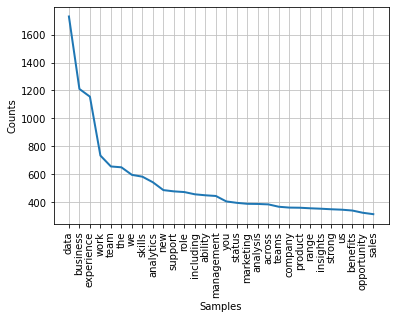

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [39]:
all_words.plot(30, cumulative=False)  # Plots a histogram of the top 30 words and their frequencies


In [40]:
word_frequency = all_words['python'] 
print(word_frequency)  

73


In [41]:
word_frequency = all_words['sql'] 
print(word_frequency)  

147


In [42]:
word_frequency = all_words['masters'] 
print(word_frequency)  

20


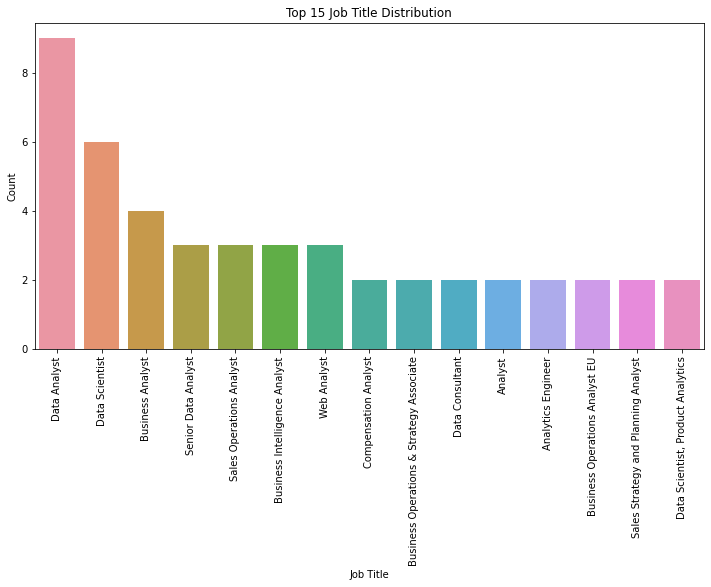

In [49]:
top_15_job_title_counts = job_title_counts.head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_15_job_title_counts.index, y=top_15_job_title_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.title('Top 15 Job Title Distribution')
plt.show()

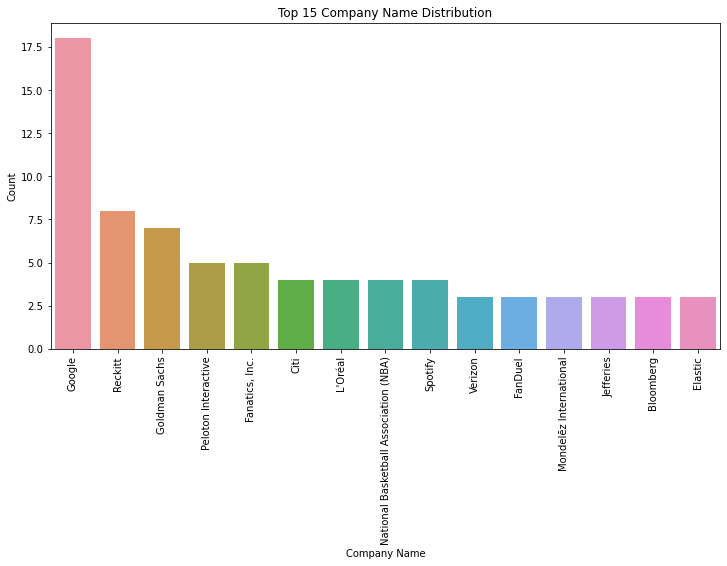

In [50]:
top_15_company_names = linkedindf['company_name'].value_counts().head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_15_company_names.index, y=top_15_company_names.values)
plt.xticks(rotation=90)
plt.xlabel('Company Name')
plt.ylabel('Count')
plt.title('Top 15 Company Name Distribution')
plt.show()

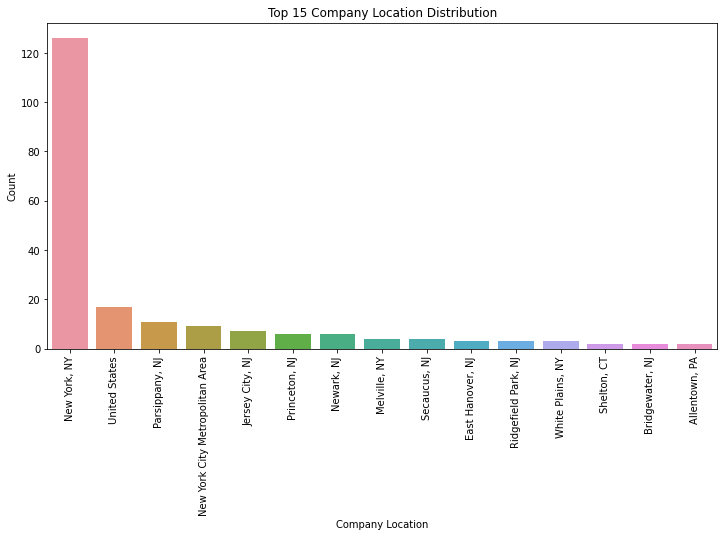

In [52]:
top_15_company_locations = linkedindf['company_location'].value_counts().head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_15_company_locations.index, y=top_15_company_locations.values)
plt.xticks(rotation=90)
plt.xlabel('Company Location')
plt.ylabel('Count')
plt.title('Top 15 Company Location Distribution')
plt.show()







In [16]:
def document_features(document):
    document_words = set(document.split())
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features


In [17]:
linkedindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        252 non-null    int64  
 1   job_title         252 non-null    object 
 2   company_name      252 non-null    object 
 3   company_location  252 non-null    object 
 4   work_method       252 non-null    object 
 5   post_date         252 non-null    object 
 6   job_desc          252 non-null    object 
 7   qualified         250 non-null    float64
dtypes: float64(1), int64(1), object(6)
memory usage: 15.9+ KB


In [18]:
import string

all_words = [word for word in linkedindf[['job_desc','qualified']] if word not in set(string.punctuation)]

In [19]:
print(all_words)

['job_desc', 'qualified']


In [43]:
summary_lot = []

for index, row in linkedindf[['job_desc','qualified']].iterrows():
        summary_lot.append(tuple(row))

In [44]:
print(summary_lot)


[(' job responsibilities supports category leads development sourcing strategy identifies correct sources information market reports internet sources… set channels get right information right person collects data internal factors spend stakeholder requirement analysis collects data external factors industry market dynamics productsservices trends conducts analysis internal external data provides analytical support procurement group assists development onboarding “ways working” documentation new procurement staff maintain rfirfq reporting procurement group create management reporting saving projects department assist development initiating successfully completing onboarding process new suppliers supports category leader implementing contract ensuring contract compliance supports collecting consolidating data contract compliance supplier performance supports identifying opportunities actions continuous improvement means analysis supplier performance internal kpi data supports sales marke

In [45]:
split = 0.7

featuresets = [(document_features(d), c) for (d,c) in summary_lot]

train_set, test_set = featuresets[int(round(len(featuresets)*split,0))-1:], featuresets[:int(round(len(featuresets)*split,0))-1]

nb_classifier = nltk.NaiveBayesClassifier.train(train_set)

In [46]:
nb_classifier.show_most_informative_features(25)


Most Informative Features
       contains(service) = True              1.0 : 0.0    =      6.6 : 1.0
        contains(always) = True              1.0 : 0.0    =      6.6 : 1.0
            contains(nj) = True              1.0 : 0.0    =      6.6 : 1.0
       contains(enhance) = True              1.0 : 0.0    =      5.7 : 1.0
     contains(multitask) = True              1.0 : 0.0    =      5.7 : 1.0
           contains(usa) = True              0.0 : 1.0    =      5.3 : 1.0
          contains(dive) = True              1.0 : 0.0    =      4.9 : 1.0
      contains(exposure) = True              1.0 : 0.0    =      4.9 : 1.0
     contains(mentality) = True              1.0 : 0.0    =      4.9 : 1.0
       contains(offices) = True              1.0 : 0.0    =      4.9 : 1.0
          contains(rate) = True              1.0 : 0.0    =      4.9 : 1.0
         contains(suite) = True              1.0 : 0.0    =      4.9 : 1.0
   contains(transgender) = True              1.0 : 0.0    =      4.9 : 1.0

In [54]:

import pandas as pd

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, GlobalMaxPooling1D, Dropout, Activation
from keras.layers import Input, TextVectorization
from keras.callbacks import *
from keras.metrics import *
from keras.backend import clear_session
from keras.layers.embeddings import Embedding
from keras.initializers import Constant

import spacy

In [58]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Splitting the data into train and test sets
X = linkedindf['job_desc'].astype(str)
y = linkedindf['qualified']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

# Tokenizing and padding the sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(list(X_train))

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_seq = pad_sequences(X_train_seq, maxlen=300)
X_test_seq = pad_sequences(X_test_seq, maxlen=300)

In [59]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

# Define the model architecture
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=300))
model.add(LSTM(units=128))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_seq, y_train, validation_data=(X_test_seq, y_test), epochs=5, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_seq, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/5
6/6 [==============================] - 3s 277ms/step - loss: nan - accuracy: 0.5060 - val_loss: nan - val_accuracy: 0.4881
Epoch 2/5
6/6 [==============================] - 1s 190ms/step - loss: nan - accuracy: 0.4881 - val_loss: nan - val_accuracy: 0.4881
Epoch 3/5
6/6 [==============================] - 1s 179ms/step - loss: nan - accuracy: 0.4881 - val_loss: nan - val_accuracy: 0.4881
Epoch 4/5
6/6 [==============================] - 1s 178ms/step - loss: nan - accuracy: 0.4881 - val_loss: nan - val_accuracy: 0.4881
Epoch 5/5
3/3 [==============================] - 0s 46ms/step - loss: nan - accuracy: 0.4881
Test Loss: nan
Test Accuracy: 0.4881
